In [1]:
import cupy as cp
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.append("../")
import nn_permuter


In [7]:
batch_size = 10000000
window_size = 3
random_windows = cp.random.randint(0, 256, (batch_size, window_size, window_size), dtype=cp.uint8)
random_physics = nn_permuter.make_permuter(nn_permuter.make_random_wide_n_deep(window_size**2, window_size**2, 2, 20))

In [8]:
updates = random_physics(random_windows)
n_same = np.sum(np.equal(random_windows, updates), axis=(-1, -2))/(window_size**2)

In [9]:
def make_cdf(x):
    return sorted(x), np.arange(len(x)) / len(x)

In [10]:
cdf_x, cdf_n = make_cdf(cp.asnumpy(n_same))

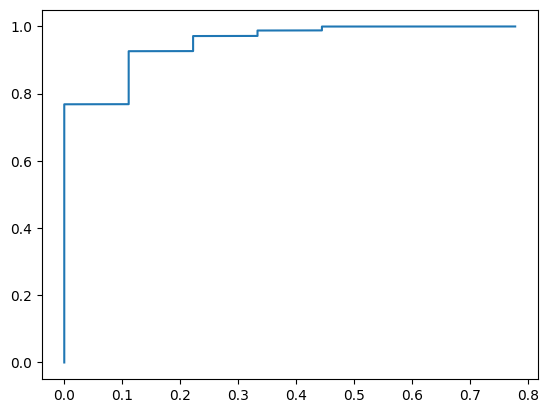

In [11]:
fig, axs = plt.subplots()
axs.plot(cdf_x, cdf_n)
